# INTRODUCTION

**In this kernel,**
We will apply the machine learning algorithms on our data.Then we will find which machine learning algorithm is the best for our data at the end of tutorial.


**Content:**
1. [Exploratory Data Analysis (EDA)](#1)
2. [EDA Visualization](#2)
   2. [Correlation Map](#3)
   2. [Pair Plot](#4)
   2. [Scatter Matrix](#5)
   2. [Scatter Matrix-Abnormal Class](#23)
   2. [Scatter Matrix-Normal Class](#24)
3. [Data PreProcessing](#6)
   3. [Normalization Data](#7)
   3. [Train-Test Split Data](#8)
4. [Machine Learning Classification Models](#9)
      4. [Logistic Regression Classification](#10)
      4. [K-Nearest Neighbors (KNN) Classification](#11)
         4. [Model Complexity](#12)
      4. [Support Vector Machine(SVM) Classification](#13)
      4. [Naive Bayes Classification](#14)
      4. [Decision Tree Classification](#15)
      4. [Random Forest Classification](#16)
5. [Evaluation Classification Models](#17)
   5. [Confusion Matrixes Comparison](#18)
   5. [Bar Charts Comparison](#19)
6. [Conclusion](#20)   

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# plotly
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff # import figure factory

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# close warning
import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

['column_2C_weka.csv', 'column_3C_weka.csv']


<a id="1"></a> <br>
# Exploratory Data Analysis (EDA)

### Import Data

In [2]:
df = pd.read_csv("input/column_2C_weka.csv")

In [3]:
# to see features and target variable
df.head()

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027818            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal

In [4]:
# Display the content of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


As you can see:

* length: 310 (range index)
* Features are float
* Target variables are object that is like string

In [5]:
# shape gives number of rows and columns in a tuple
df.shape

(310, 7)

In [6]:
df.describe()

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
count        310.000000           310.000000             310.000000   
mean          60.496653            17.542822              51.930930   
std           17.236520            10.008330              18.554064   
min           26.147921            -6.554948              14.000000   
25%           46.430294            10.667069              37.000000   
50%           58.691038            16.357689              49.562398   
75%           72.877696            22.120395              63.000000   
max          129.834041            49.431864             125.742385   

       sacral_slope  pelvic_radius  degree_spondylolisthesis  
count    310.000000     310.000000                310.000000  
mean      42.953831     117.920655                 26.296694  
std       13.423102      13.317377                 37.559027  
min       13.366931      70.082575                -11.058179  
25%       33.347122     110.709196                  1.603727  
50%       42.404912     118.268178                 11.767934  
75%       52.695888     125.467674                 41.287352  
max      121.429566     163.071041                418.543082

In [7]:
# Display positive and negative correlation between columns
df.corr()

pelvic_incidence  pelvic_tilt numeric  \
pelvic_incidence                  1.000000             0.629199   
pelvic_tilt numeric               0.629199             1.000000   
lumbar_lordosis_angle             0.717282             0.432764   
sacral_slope                      0.814960             0.062345   
pelvic_radius                    -0.247467             0.032668   
degree_spondylolisthesis          0.638743             0.397862   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                       0.717282      0.814960      -0.247467   
pelvic_tilt numeric                    0.432764      0.062345       0.032668   
lumbar_lordosis_angle                  1.000000      0.598387      -0.080344   
sacral_slope                           0.598387      1.000000      -0.342128   
pelvic_radius                         -0.080344     -0.342128       1.000000   
degree_spondylolisthesis               0.533667      0.523557      -0.026065   

                          degree_spondylolisthesis  
pelvic_incidence                          0.638743  
pelvic_tilt numeric                       0.397862  
lumbar_lordosis_angle                     0.533667  
sacral_slope                              0.523557  
pelvic_radius                            -0.026065  
degree_spondylolisthesis                  1.000000

In [8]:
#sorts all correlations with ascending sort.
df.corr().unstack().sort_values().drop_duplicates()

pelvic_radius             sacral_slope               -0.342128
pelvic_incidence          pelvic_radius              -0.247467
pelvic_radius             lumbar_lordosis_angle      -0.080344
                          degree_spondylolisthesis   -0.026065
pelvic_tilt numeric       pelvic_radius               0.032668
                          sacral_slope                0.062345
                          degree_spondylolisthesis    0.397862
lumbar_lordosis_angle     pelvic_tilt numeric         0.432764
sacral_slope              degree_spondylolisthesis    0.523557
lumbar_lordosis_angle     degree_spondylolisthesis    0.533667
                          sacral_slope                0.598387
pelvic_tilt numeric       pelvic_incidence            0.629199
degree_spondylolisthesis  pelvic_incidence            0.638743
lumbar_lordosis_angle     pelvic_incidence            0.717282
pelvic_incidence          sacral_slope                0.814960
                          pelvic_incidence            1

<a id="2"></a> <br>
# EDA Visualization

<a id="3"></a> <br>
#### Correlation Map

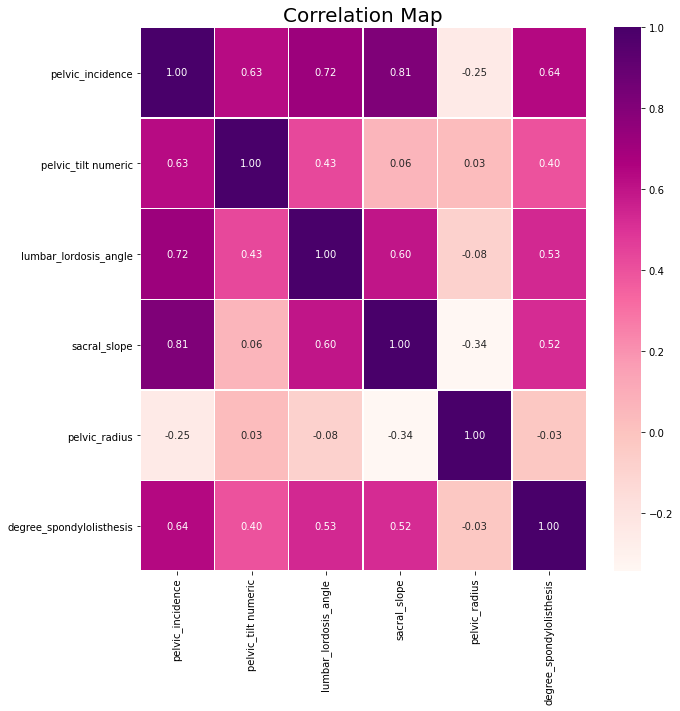

In [9]:
#correlation map
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidth=".5", cmap="RdPu", fmt=".2f", ax = ax)
plt.title("Correlation Map",fontsize=20)
plt.show()

<a id="21"></a> <br>
### Pair Plot

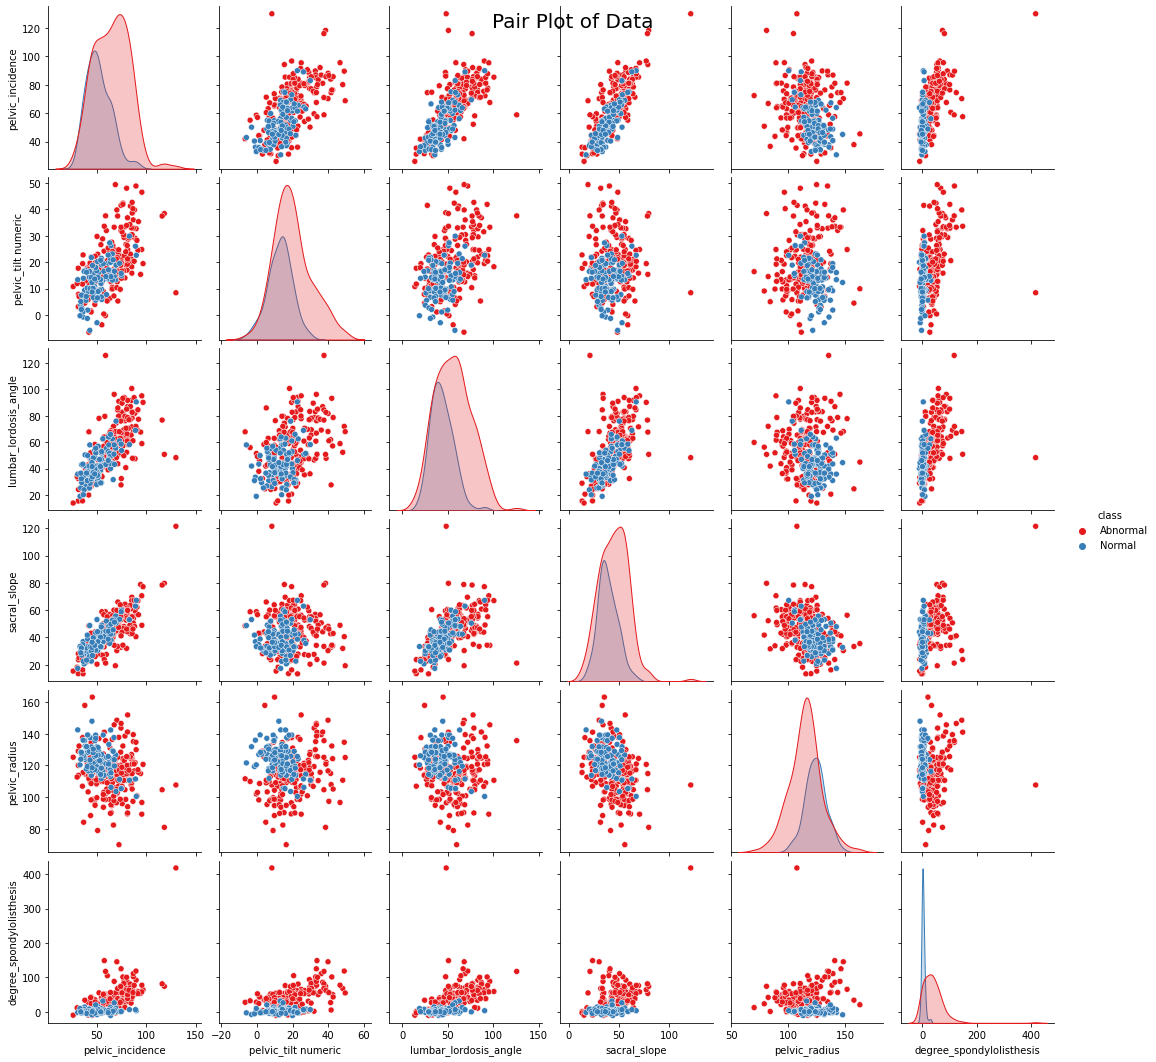

In [10]:
sns.pairplot(data=df,hue="class",palette="Set1")
plt.suptitle("Pair Plot of Data",fontsize=20)
plt.show()   # pairplot without standard deviaton fields of data

<a id="5"></a> <br>
### Scatter Matrix

**pd.plotting.scatter_matrix:**
* green: *normal* and red: *abnormal*
* c:  color
* figsize: figure size
* diagonal: histohram of each features
* alpha: opacity
* s: size of marker
* marker: marker type 

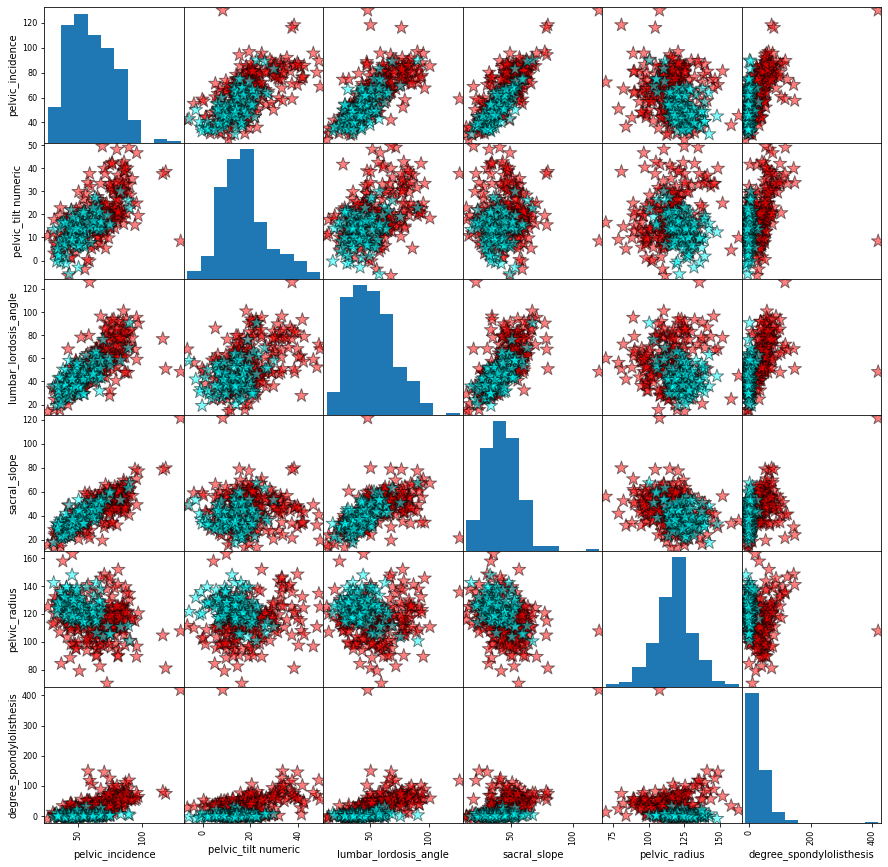

In [11]:
color_list = ["red" if each=="Abnormal" else "cyan" for each in df.loc[:,"class"]]
pd.plotting.scatter_matrix(df.loc[:, df.columns != "class"],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal="hist",
                                       alpha=0.5,
                                       s = 200,
                                       marker = "*",
                                       edgecolor= "black")
plt.show()

<a id="23"></a> <br>
### Scatter Matrix-Abnormal Class

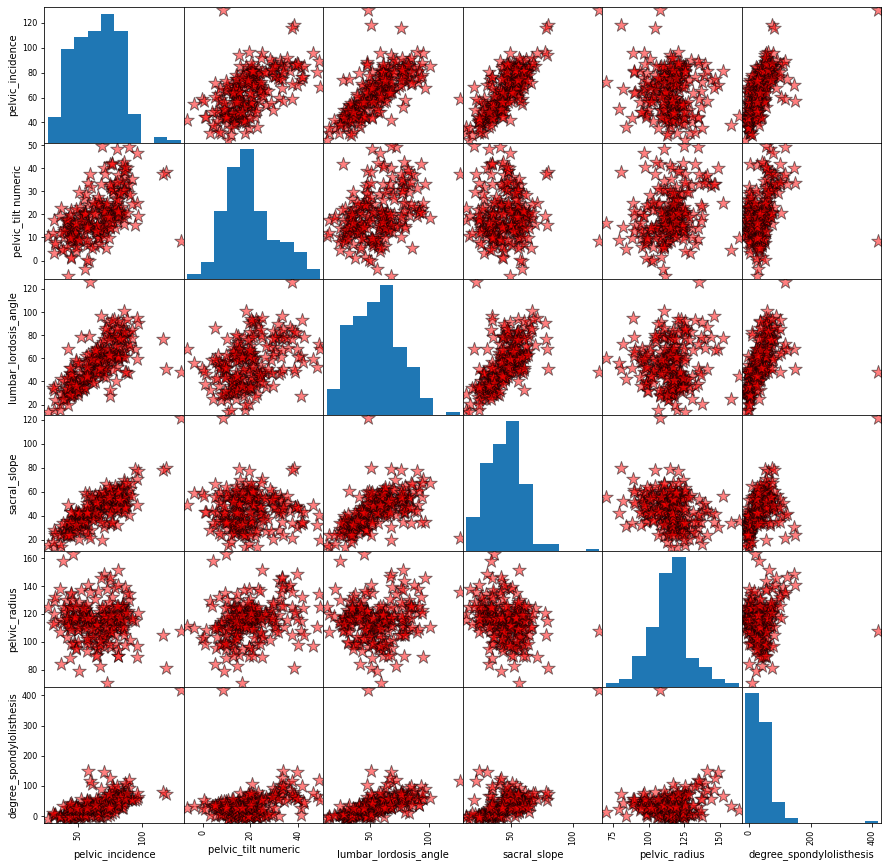

In [12]:
df_abnormal = df[df["class"]=="Abnormal"]
pd.plotting.scatter_matrix(df_abnormal.loc[:, df_abnormal.columns != "class"],
                                       c="red",
                                       figsize= [15,15],
                                       diagonal="hist",
                                       alpha=0.5,
                                       s = 200,
                                       marker = "*",
                                       edgecolor= "black")
plt.show()

<a id="24"></a> <br>
### Scatter Matrix-Normal Class

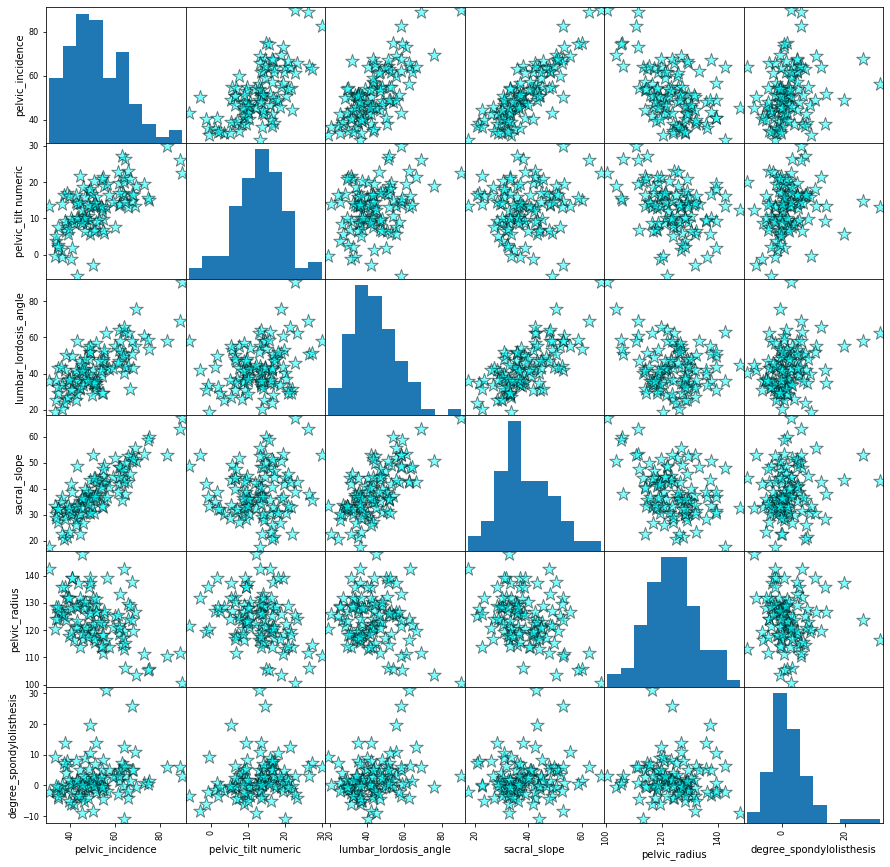

In [13]:
df_normal = df[df['class']=='Normal']
pd.plotting.scatter_matrix(df_normal.loc[:, df_normal.columns != "class"],
                                       c="cyan",
                                       figsize= [15,15],
                                       diagonal="hist",
                                       alpha=0.5,
                                       s = 200,
                                       marker = "*",
                                       edgecolor= "black")
plt.show()

In [14]:
# prepare data
data1 = len(df["class"][df["class"] == "Abnormal"])
data2 = len(df["class"][df["class"] == "Normal"])

data = [go.Bar(
            x=["Abnormal","Normal"],
            y=[data1,data2],
            marker=dict(color='rgb(158,202,225)',
            line=dict(color='rgba(254, 69, 62, 1)',
            width=1.5),
        ),
    opacity=0.6
    )]

iplot(data, filename='text-hover-bar')

<a id="6"></a> <br>
# Data PreProcessing 

In [15]:
df["class"] = [0 if each == "Abnormal" else 1 for each in df["class"]]

y = df["class"].values
x_data = df.drop(["class"], axis=1)

<a id="7"></a> <br>
### Normalization Data

* Normalization Formula = (x - min(x))/(max(x)-min(x))

In [16]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [17]:
x.head()

pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0          0.355688             0.519900               0.229180      0.250857   
1          0.124501             0.296783               0.098578      0.144629   
2          0.411666             0.513932               0.322995      0.307661   
3          0.416151             0.557414               0.271260      0.289436   
4          0.227272             0.289479               0.128129      0.247022   

   pelvic_radius  degree_spondylolisthesis  
0       0.307461                  0.025148  
1       0.476649                  0.036365  
2       0.386097                  0.017523  
3       0.341826                  0.051838  
4       0.409579                  0.044173

In [18]:
x.isnull().sum() #Indicates values not defined in our data

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
dtype: int64

In [19]:
x.isnull().sum().sum()  #Indicates sum of values in our data

0

In [20]:
print(x.shape)
print(y.shape)

(310, 6)
(310,)


<a id="8"></a> <br>
### Train-Test Split Data

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (217, 6)
x_test:  (93, 6)
y_train:  (217,)
y_test:  (93,)


<a id="9"></a> <br>
# Machine Learning Classification Models

<a id="10"></a> <br>
### Logistic Regression Classification

In [22]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

#Print Train Accuracy
lr_train_accuracy = lr_model.score(x_train,y_train)
print("lr_train_accuracy = ",lr_model.score(x_train,y_train))
#Print Test Accuracy
lr_test_accuracy = lr_model.score(x_test,y_test)
print("lr_test_accuracy = ",lr_model.score(x_test,y_test))

lr_train_accuracy =  0.7649769585253456
lr_test_accuracy =  0.7419354838709677


In [23]:
data = [go.Bar(
            x=["lr_train_accuracy","lr_test_accuracy"],
            y=[lr_train_accuracy,lr_test_accuracy],
            marker=dict(color='rgb(158,202,225)',
            line=dict(color='rgba(254, 69, 62, 1)',
            width=1.5),
        ),
    opacity=0.6
    )]

iplot(data, filename='text-hover-bar')

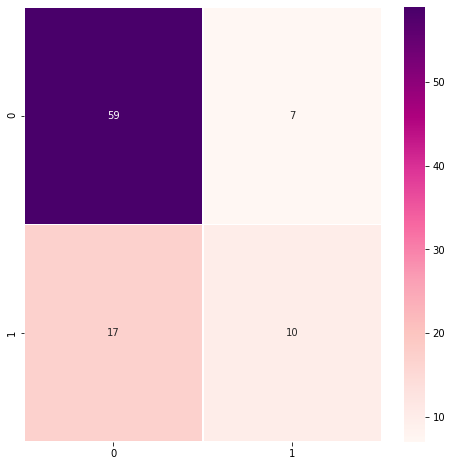

In [24]:
y_pred = lr_model.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm_lr, annot=True, linewidth=0.5, fmt=".0f",  cmap='RdPu', ax = ax)
plt.xlabel = ('y_pred')
plt.ylabel = ('y_true')
plt.show()

In [25]:
tp ,fp ,fn ,tn= cm_lr.ravel()
print("lr_RECALL = ",tp/(tp+fn))
print("lr_PRECISION = ",(tp/(tp+fp)))

lr_RECALL =  0.7763157894736842
lr_PRECISION =  0.8939393939393939


<a id="11"></a> <br>
## K-Nearest Neighbors (KNN) Classification

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

#Print Train Accuracy
knn_train_accuracy = knn_model.score(x_train,y_train)
print("knn_train_accuracy = ",knn_model.score(x_train,y_train))
#Print Test Accuracy
knn_test_accuracy = knn_model.score(x_test,y_test)
print("knn_test_accuracy = ",knn_model.score(x_test,y_test))

knn_train_accuracy =  0.880184331797235
knn_test_accuracy =  0.7526881720430108


<a id="12"></a> <br>
### Model Complexity

<br> Now the question is why we choose K = 3 or what value we need to choose K. The answer is in model complexity

<br> **Model complexity:**
* K has general name. It is called a hyperparameter. For now just know K is hyperparameter and we need to choose it that gives best performace. 
* Literature says if k is small, model is complex model can lead to overfit. It means that model memorizes the train sets and cannot predict test set with good accuracy.
* If k is big, model that is less complex model can lead to underfit. 
* At below, I range K value from 1 to 30(exclude) and find accuracy for each K value. As you can see in plot, when K is 1 it memorize train sets and cannot give good accuracy on test set (overfit). Also if K is 20 or 22, model is lead to underfit. Again accuracy is not enough. However look at when K is 20 or 22(best performance), accuracy has highest value almost 82%. 

In [27]:
# Model complexity
neighboors = np.arange(1,30)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neighboors):
    # k from 1 to 30(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # fit with knn
    knn.fit(x_train, y_train)
    train_accuracy.append(knn.score(x_train, y_train))           # train accuracy
    test_accuracy.append(knn.score(x_test, y_test))              # test accuracy

# import graph objects as "go"
import plotly.graph_objs as go

# Creating trace1
trace1 = go.Scatter(
                    x = neighboors,
                    y = train_accuracy,
                    mode = "lines",
                    name = "train_accuracy",
                    marker = dict(color = 'rgba(160, 112, 2, 0.8)'),
                    text= "train_accuracy")
# Creating trace2
trace2 = go.Scatter(
                    x = neighboors,
                    y = test_accuracy,
                    mode = "lines+markers",
                    name = "test_accuracy",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= "test_accuracy")
data = [trace1, trace2]
layout = dict(title = 'K Value vs Accuracy',
              xaxis= dict(title= 'Number of Neighboors',ticklen= 10,zeroline= True)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

knn_train_accuracy = np.max(train_accuracy)
knn_test_accuracy = np.max(test_accuracy)
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy), 1+test_accuracy.index(np.max(test_accuracy))))

Best accuracy is 0.8172043010752689 with K = 22


In [28]:
data = [go.Bar(
            x=["knn_train_accuracy","knn_test_accuracy"],
            y=[knn_train_accuracy,knn_test_accuracy],
            marker=dict(color='rgb(158,202,225)',
            line=dict(color='rgba(254, 69, 62, 1)',
            width=1.5),
        ),
    opacity=0.6
    )]

iplot(data, filename='text-hover-bar')

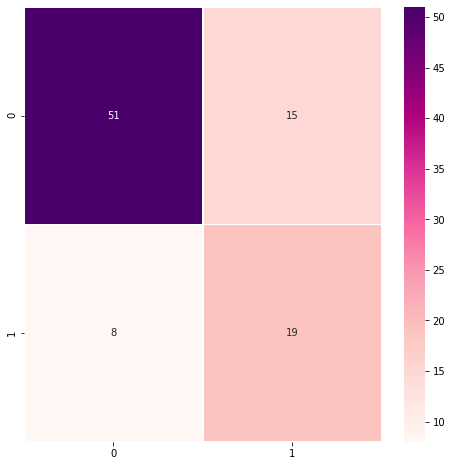

In [29]:
y_pred = knn_model.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",  cmap='RdPu', ax = ax)
plt.xlabel = ("y_pred")
plt.ylabel = ("y_true")
plt.show()

In [30]:
tp ,fp ,fn ,tn= cm_knn.ravel()
print("knn_RECALL = ",tp/(tp+fn))
print("knn_PRECISION = ",(tp/(tp+fp)))

knn_RECALL =  0.864406779661017
knn_PRECISION =  0.7727272727272727


<a id="13"></a> <br>
### Support Vector Machine(SVM) Classification

In [31]:
from sklearn.svm import SVC

svm_model = SVC(random_state=1)
svm_model.fit(x_train,y_train)

#Print Train Accuracy
svm_train_accuracy = svm_model.score(x_train,y_train)
print("svm_train_accuracy = ",svm_model.score(x_train,y_train))
#Print Test Accuracy
svm_test_accuracy = svm_model.score(x_test,y_test)
print("svmr_test_accuracy = ",svm_model.score(x_test,y_test))

svm_train_accuracy =  0.8387096774193549
svmr_test_accuracy =  0.8064516129032258


In [32]:
data = [go.Bar(
            x=["svm_train_accuracy","svm_test_accuracy"],
            y=[svm_train_accuracy,svm_test_accuracy],
            marker=dict(color='rgb(158,202,225)',
            line=dict(color='rgba(254, 69, 62, 1)',
            width=1.5),
        ),
    opacity=0.6
    )]

iplot(data, filename='text-hover-bar')

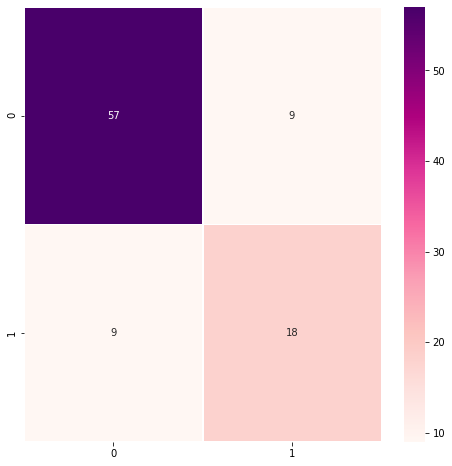

In [33]:
y_pred = svm_model.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm_svm, annot=True, linewidth=0.5, fmt=".0f",  cmap='RdPu', ax = ax)
plt.xlabel = ("y_pred")
plt.ylabel = ("y_true")
plt.show()

In [34]:
tp ,fp ,fn ,tn= cm_svm.ravel()
print("svm_RECALL = ",tp/(tp+fn))
print("svm_PRECISION = ",(tp/(tp+fp)))

svm_RECALL =  0.8636363636363636
svm_PRECISION =  0.8636363636363636


<a id="14"></a> <br>
### Naive Bayes Classification

In [35]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

#Print Train Accuracy
nb_train_accuracy = nb_model.score(x_train,y_train)
print("nb_train_accuracy = ",nb_model.score(x_train,y_train))
#Print Test Accuracy
nb_test_accuracy = nb_model.score(x_test,y_test)
print("nb_test_accuracy = ",nb_model.score(x_test,y_test))

nb_train_accuracy =  0.7695852534562212
nb_test_accuracy =  0.8172043010752689


In [36]:
data = [go.Bar(
            x=["nb_train_accuracy","nb_test_accuracy"],
            y=[nb_train_accuracy,nb_test_accuracy],
            marker=dict(color='rgb(158,202,225)',
            line=dict(color='rgba(254, 69, 62, 1)',
            width=1.5),
        ),
    opacity=0.6
    )]

iplot(data, filename='text-hover-bar')

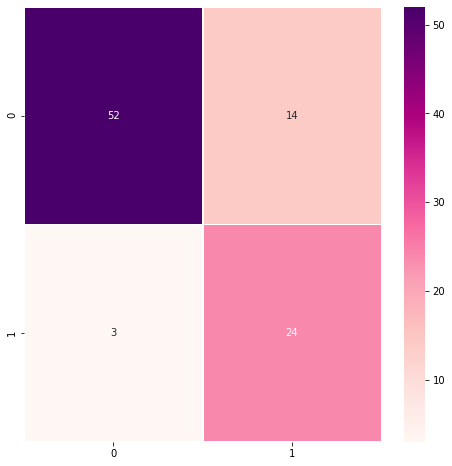

In [37]:
y_pred = nb_model.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='RdPu', ax = ax)
plt.xlabel = ("y_pred")
plt.ylabel = ("y_true")
plt.show()

In [38]:
tp ,fp ,fn ,tn= cm_nb.ravel()
print("nb_RECALL = ",tp/(tp+fn))
print("nb_PRECISION = ",(tp/(tp+fp)))

nb_RECALL =  0.9454545454545454
nb_PRECISION =  0.7878787878787878


<a id="15"></a> <br>
### Decision Tree Classification

In [39]:
from sklearn.tree import DecisionTreeClassifier
#if you remove random_state=1, you can see how accuracy is changing
#Accuracy changing depends on splits
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(x_train,y_train)

#Print Train Accuracy
dt_train_accuracy = dt_model.score(x_train,y_train)
print("dt_train_accuracy = ",dt_model.score(x_train,y_train))
#Print Test Accuracy
dt_test_accuracy = dt_model.score(x_test,y_test)
print("dt_test_accuracy = ",dt_model.score(x_test,y_test))

dt_train_accuracy =  1.0
dt_test_accuracy =  0.7849462365591398


In [40]:
data = [go.Bar(
            x=["dt_train_accuracy","dt_test_accuracy"],
            y=[dt_train_accuracy,dt_test_accuracy],
            marker=dict(color='rgb(158,202,225)',
            line=dict(color='rgba(254, 69, 62, 1)',
            width=1.5),
        ),
    opacity=0.6
    )]

iplot(data, filename='text-hover-bar')

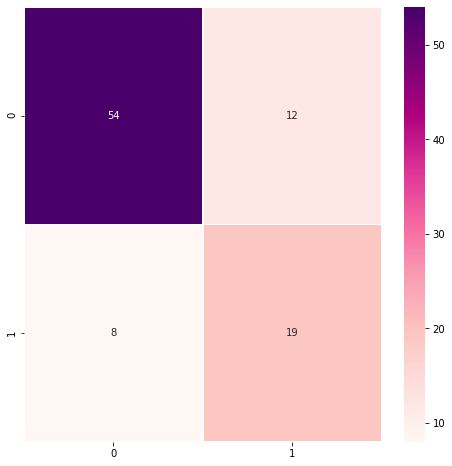

In [41]:
y_pred = dt_model.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='RdPu', ax = ax)
plt.xlabel = ("y_pred")
plt.ylabel = ("y_true")
plt.show()

In [42]:
tp ,fp ,fn ,tn= cm_dt.ravel()
print("dt_RECALL = ",tp/(tp+fn))
print("dt_PRECISION = ",(tp/(tp+fp)))

dt_RECALL =  0.8709677419354839
dt_PRECISION =  0.8181818181818182


<a id="16"></a> <br>
### Random Forest Classification

In [43]:
from sklearn.ensemble import RandomForestClassifier

#n_estimators = 100 => Indicates how many trees we have
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(x_train,y_train)

#Print Train Accuracy
rf_train_accuracy = rf_model.score(x_train,y_train)
print("rf_train_accuracy = ",rf_model.score(x_train,y_train))
#Print Test Accuracy
rf_test_accuracy = rf_model.score(x_test,y_test)
print("rf_test_accuracy = ",rf_model.score(x_test,y_test))

rf_train_accuracy =  0.9953917050691244
rf_test_accuracy =  0.8602150537634409


In [44]:
data = [go.Bar(
            x=["rf_train_accuracy","rf_test_accuracy"],
            y=[rf_train_accuracy,rf_test_accuracy],
            marker=dict(color='rgb(158,202,225)',
            line=dict(color='rgba(254, 69, 62, 1)',
            width=1.5),
        ),
    opacity=0.6
    )]

iplot(data, filename='text-hover-bar')

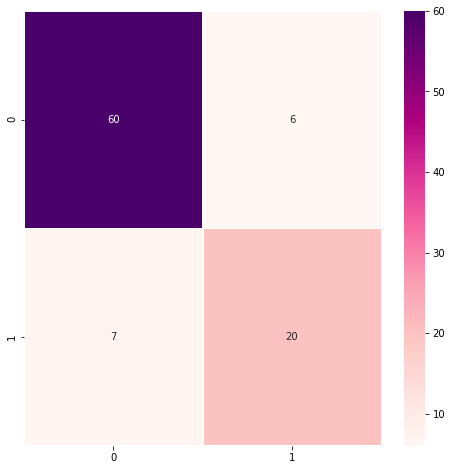

In [45]:
y_pred = rf_model.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='RdPu', ax = ax)
plt.xlabel = ("y_pred")
plt.ylabel = ("y_true")
plt.show()

In [46]:
tp ,fp ,fn ,tn= cm_rf.ravel()
print("rf_RECALL = ",tp/(tp+fn))
print("rf_PRECISION = ",(tp/(tp+fp)))

rf_RECALL =  0.8955223880597015
rf_PRECISION =  0.9090909090909091


<a id="17"></a> <br>
# Evaluation Classification Models

<a id="18"></a> <br>
### Confusion Matrixes Comparison

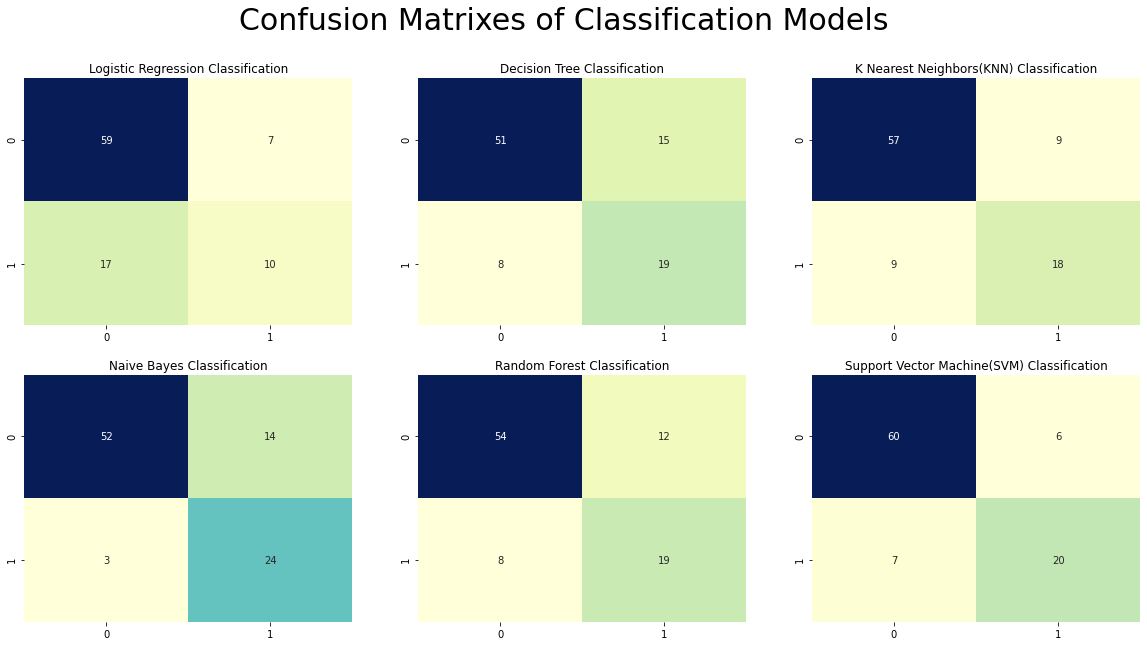

In [47]:
plt.figure(figsize=(20,10))
plt.suptitle("Confusion Matrixes of Classification Models",fontsize=30)

plt.subplot(2,3,1)
plt.title("Logistic Regression Classification")
sns.heatmap(cm_lr,annot=True,cmap='YlGnBu',fmt=".0f",cbar=False)

plt.subplot(2,3,2)
plt.title("Decision Tree Classification")
sns.heatmap(cm_knn,annot=True,cmap='YlGnBu',fmt=".0f",cbar=False)

plt.subplot(2,3,3)
plt.title("K Nearest Neighbors(KNN) Classification")
sns.heatmap(cm_svm,annot=True,cmap='YlGnBu',fmt=".0f",cbar=False)

plt.subplot(2,3,4)
plt.title("Naive Bayes Classification")
sns.heatmap(cm_nb,annot=True,cmap='YlGnBu',fmt=".0f",cbar=False)

plt.subplot(2,3,5)
plt.title("Random Forest Classification")
sns.heatmap(cm_dt,annot=True,cmap='YlGnBu',fmt=".0f",cbar=False)

plt.subplot(2,3,6)
plt.title("Support Vector Machine(SVM) Classification")
sns.heatmap(cm_rf,annot=True,cmap='YlGnBu',fmt=".0f",cbar=False)

plt.show()

<a id="19"></a> <br>
### Bar Charts Comparison

In [48]:
# create trace1 
trace1 = go.Bar(
         x = np.array("Logistic Regression"),
         y = np.array(lr_test_accuracy),
         name = "Logistic Regression",
         marker = dict(color ='rgba(255, 77, 77, 1)',
         line=dict(color='rgb(0,0,0)',width=1.5))
                    )
# create trace2 
trace2 = go.Bar(
         x = np.array("KNN"),
         y = np.array(knn_test_accuracy),
         name = "KNN",
         marker = dict(color ='rgba(9, 220, 125, 1)',
         line=dict(color='rgb(0,0,0)',width=1.5))
                    )
# create trace3 
trace3 = go.Bar(
         x = np.array("SVM"),
         y = np.array(svm_test_accuracy),
         name = "SVM",
         marker = dict(color ='rgba(36, 44, 188, 1)',
         line=dict(color='rgb(0,0,0)',width=1.5))
                    )
# create trace4 
trace4 = go.Bar(
         x = np.array("Naive Bayes"),
         y = np.array(nb_test_accuracy),
         name = "Naive Bayes",
         marker = dict(color ='rgba(209, 0, 224, 1)',
         line=dict(color='rgb(0,0,0)',width=1.5))
                    )
# create trace5 
trace5 = go.Bar(
         x = np.array("Decision Tree"),
         y = np.array(dt_test_accuracy),
         name = "Decision Tree",
         marker = dict(color ='rgba(0, 224, 209, 1)',
         line=dict(color='rgb(0,0,0)',width=1.5))
                    )
# create trace6 
trace6 = go.Bar(
         x = np.array("Random Forest"),
         y = np.array(rf_test_accuracy),
         name = "Random Forest",
         marker = dict(color ='rgba(255, 255, 61, 1)',
         line=dict(color='rgb(0,0,0)',width=1.5))
                    )

data = [trace1,trace2,trace3,trace4,trace5,trace6]
layout = go.Layout(barmode = "group",title="Machine Learning Classification Models Comparison")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

**As you can see,**
the best machine learning algorithm for our data is Random Forest Classification algorithm with 86%.

<a id="20"></a> <br>
# Conclusion
**If you like it, Please upvote my kernel.**<br>
**If you have any question, I will happy to hear it**